In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
epsilon = 0.01
N_0_squared = 100
r_m = 0.1
k = 2 * np.pi * 6
m = 2 * np.pi * 3
m_u = 2 * np.pi * 7
k_e_square = k**2 + m**2
k_plus_square = k**2 + (m + m_u)**2

# Define matrices for the system
W_e = np.array([[-1, (k / k_e_square)], [-k * N_0_squared, -1]], dtype=float)
W_plus = np.array([[-1, -k / k_plus_square], [k * N_0_squared, -1]], dtype=float)
L_e_plus = np.array([[(-k / (2 * k_e_square)) * (k_plus_square - m_u**2), 0],
                     [0, k / 2]], dtype=float)
L_plus_e = np.array([[(-k / (2 * k_plus_square)) * (m_u**2 - k_e_square), 0],
                     [0, -k / 2]], dtype=float)

# Initial conditions
phi_e = np.array([0.0, 0.0])  # Initial condition for phi_e
phi_plus = np.array([0.0, 0.0])  # Initial condition for phi_plus
U = 0.001  # Initial condition for U

# Time parameters
dt = 0.001  # Time step
total_time = 200  # Total time for simulation
num_steps = int(total_time / dt)  # Number of time steps

# Initialize lists for storing simulation history
phi_e_history = []
phi_plus_history = []
U_history = [U]
R_vals = []

# Initialize lists for calculations
psi_e = []
b_e = []
phi_e_0 = []
phi_plus_0 = []


# Simulation loop
for i in range(num_steps):
    eta = np.random.normal(0, 1)  # Gaussian white noise
    xi = np.array([2 * np.sqrt(2) * eta / np.sqrt(k_e_square), 0], dtype=float)

    # Update equations
    phi_e_dot = W_e @ phi_e + U * (L_e_plus @ phi_plus) + (np.sqrt(epsilon) * xi) / np.sqrt(dt)
    phi_plus_dot = W_plus @ phi_plus + U * (L_plus_e @ phi_e)

    # Euler integration
    phi_e += phi_e_dot * dt
    phi_plus += phi_plus_dot * dt
    R = 0.25 * k * (k_plus_square - k_e_square) * phi_e[0] * phi_plus[0]
    R_vals.append(R)
    U_dot = R - r_m * U
    U += U_dot * dt

    # Record state variables
    psi_e.append(phi_e[0])
    b_e.append(phi_e[1])
    phi_e_0.append(phi_e[0])
    phi_plus_0.append(phi_plus[0])

    # Record history for plotting
    phi_e_history.append(phi_e.copy())
    phi_plus_history.append(phi_plus.copy())
    U_history.append(U)

print(np.mean(U_history))

0.11930083334767606



C_11: 8.8711471789788e-06
C_12: -0.0005499077853178983
C_22: 1.5925047367550489

Calculated C_11: 1.1396895828081892e-05
Calculated C_12: -0.0005239668908375156
Calculated C_22: 1.9753086419753092


ValueError: x and y must have same first dimension, but have shapes (200000,) and (200001,)

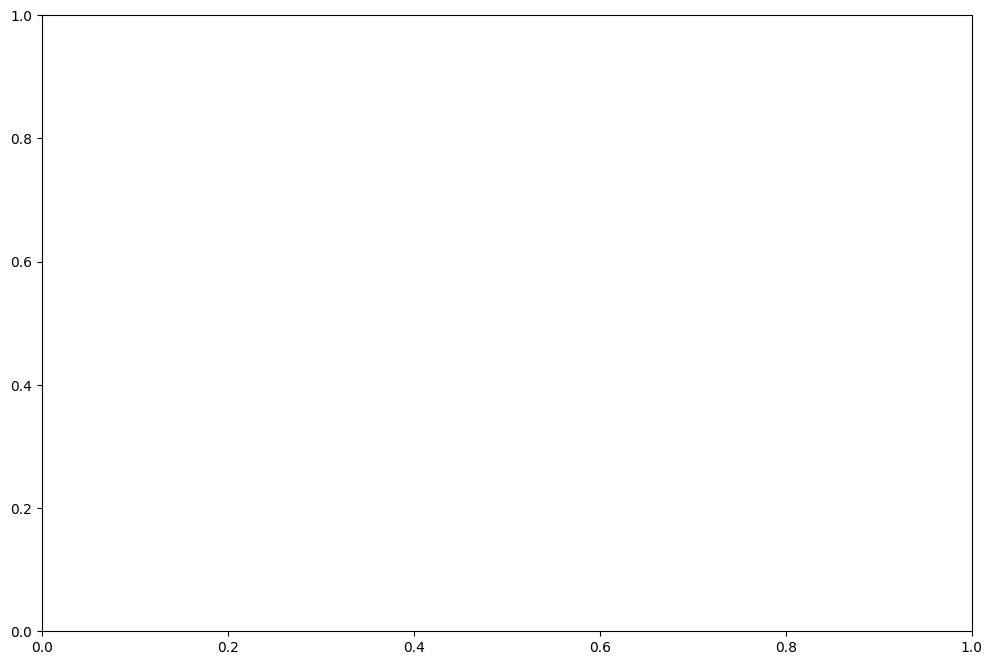

In [2]:
# Convert lists to NumPy arrays for analysis
psi_e = np.array(psi_e)
b_e = np.array(b_e)

# Calculate and print correlation functions
C_11 = np.average(np.square(psi_e))
C_12 = np.average(psi_e * b_e)
C_22 = np.average(np.square(b_e))
print("\nC_11:", C_11)
print("C_12:", C_12)
print("C_22:", C_22)

# Calculate theoretical correlation functions
c11_theoretical = ((2 * epsilon) / k_e_square) * (2 - ((k**2 * N_0_squared) / (k_e_square + (k**2) * N_0_squared)))
c12_theoretical = -(2 * epsilon * k * N_0_squared) / (k_e_square + k**2 * N_0_squared)
c22_theoretical = (2 * epsilon) * k**2 * N_0_squared**2 / (k_e_square + k**2 * N_0_squared)
print("\nCalculated C_11:", c11_theoretical)
print("Calculated C_12:", c12_theoretical)
print("Calculated C_22:", c22_theoretical)

# Plot U vs time
plt.figure(figsize=(12, 8))
plt.plot(np.arange(0, total_time, dt), U_history)
plt.grid()
plt.title('U vs Time')
plt.xlabel('Time')
plt.ylabel('U')
plt.show()

# Plot R vs time
plt.figure(figsize=(12, 8))
plt.plot(np.arange(0, total_time, dt), R_vals)
plt.grid()
plt.title('R vs Time')
plt.xlabel('Time')
plt.ylabel('R')
plt.show()